# DRILL: Mo' blobs, mo' problems?

You've seen how these three methods work on three blobs of reasonably separated data. Now go back and change the data. Create more or fewer blobs, and set the blobs closer together or farther apart. Set up at least three different blob configuations, then run the four methods ( kk -means, mean shift, spectral clustering and affinity propagation) on each one. Write up a report for your mentor where you discuss what you learned about the clustering methods based on their relative performance for your different blob setups.

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
%matplotlib inline

# Blob 1: Distinct

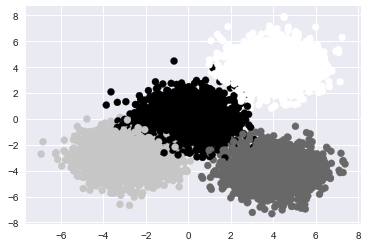

In [17]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split

# The coordinates of the centers of our blobs.
centers = [[4, 4], [-3, -3], [4, -4], [0,0]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [18]:
#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

## K means

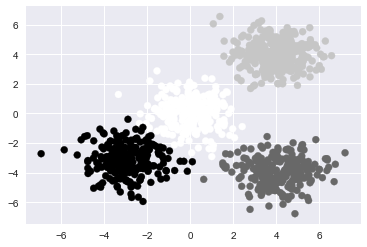

Comparing k-means clusters against the data:
col_0    0    1    2    3
row_0                    
0        0    5    2  247
1      273    0    0    1
2        0    0  236    1
3        0  234    0    1


In [19]:
# Calculate predicted values.
y_pred = KMeans(n_clusters=4, random_state=42).fit_predict(X_train)

# Plot the solution.
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y_train))

### Mean shift

2.36288844809
Number of estimated clusters: 4
[[ 4.01335031  4.00083317]
 [-0.02569208  0.11710853]
 [-2.86405246 -3.03831637]
 [ 4.18814136 -3.99720501]]


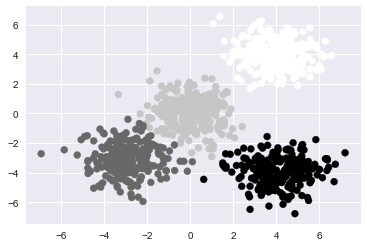

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3
row_0                    
0      273    0    0    0
1        0    3  236    0
2        0    2    0  236
3        1  246    2    1


In [10]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Here we set the bandwidth. Quantile makes large difference - one hp for another?!?
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)
print(bandwidth)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

print(cluster_centers)

plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

## Spectral clustering

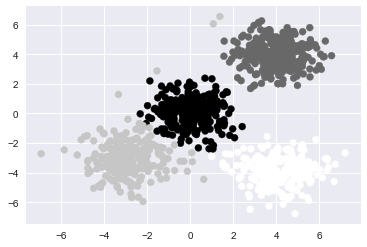

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3
row_0                    
0        0    2  271    0
1        0  236    0    3
2      235    1    0    2
3        2    6    1  241


In [11]:
from sklearn.cluster import SpectralClustering

# Declare and fit the model.
sc = SpectralClustering(n_clusters=4)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

## Affinity propagation

In [12]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

# Declare the model and fit it in one statement.
af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))


Done
Estimated number of clusters: 19


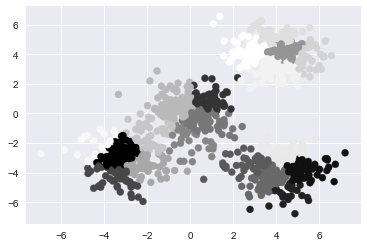

Comparing the assigned categories to the ones in the data:
col_0  0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  \
row_0                                                                           
0      62   0  71   0  43  36   0   0   0  60   0   0   0   0   0   1   0   0   
1       0  22   0   0   0   0  32   1  54   0   5   0   0   0  47   0   0   0   
2       0   0   0  31   0   0   0   0   0   0   1   1  78  42   0   0  25  60   
3       0   0   1   0   0   0  16  91   0   0  25  65   0   1   0  51   0   0   

col_0  18  
row_0      
0       0  
1      78  
2       0  
3       0  


In [13]:
#Predicted clusters.
predict=af.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

# Blob 2: Close

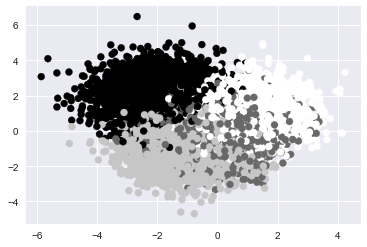

In [20]:
centers = [[1, 1], [-1, -1], [0, 0], [-2,2]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

## Kmeans

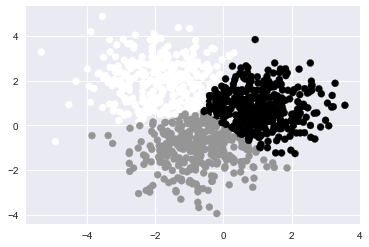

Comparing k-means clusters against the data:
col_0    0    1    2    3
row_0                    
0       22   12   27  233
1       14  204  103   10
2      237   23  108    7


In [22]:
y_pred = KMeans(n_clusters=3, random_state=42).fit_predict(X_train)

# Plot the solution.
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y_train))


## Mean shift

[[ 0.1660722   0.24025799]]


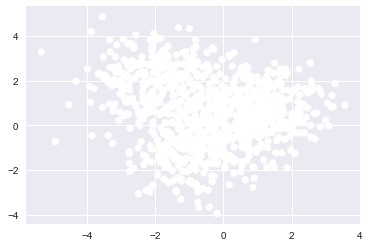

Comparing the assigned categories to the ones in the data:
col_0    0
row_0     
0      273
1      239
2      238
3      250


In [24]:
# Use default quintile of 0.3
bandwidth = estimate_bandwidth(X_train, n_samples=500)

ms = MeanShift(bandwidth = bandwidth)
ms.fit(X_train)

y_pred = ms.fit_predict(X_train)

cluster_centers = ms.cluster_centers_
print(cluster_centers)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,y_pred))


## Spectoral clustering

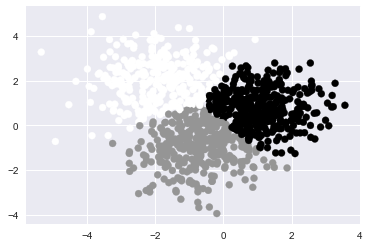

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0       21   17  235
1       11  207   21
2       23  111  104
3      234   11    5


In [29]:
sc = SpectralClustering(n_clusters = 3).fit(X_train)

#Predicted clusters.
y_pred=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,y_pred))

## Affinity propagation

[  3  15  17  22  23  41  67  75  98 115 116 129 138 154 161 167 171 185
 186 190 201 213 218 231 241 253 274 275 280 283 319 332 336 338 348 353
 360 364 365 380 389 390 432 433 460 466 495 501 507 508 513 523 532 540
 578 593 595 596 600 605 614 616 628 632 633 640 659 667 668 675 688 692
 699 704 709 716 723 727 735 742 744 745 754 755 773 800 803 809 811 818
 820 830 832 837 872 878 882 901 957 966 987 992 996]
Estimated number of clusters: 19


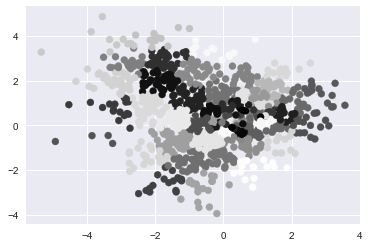

Comparing the assigned categories to the ones in the data:
col_0  0    1    2    3    4    5    6    7    8    9   ...   93   94   95   \
row_0                                                   ...                   
0        1    1    0    2    3    0    4    0    5    1 ...     6    1    1   
1        0    0    8    0    6    0    0    0    0    0 ...     0    2    0   
2        0    0    8    0    7    1    0    1    5    3 ...     1    3    0   
3        0    0    0    0    0    0    8    0    0    0 ...     1    0    0   

col_0  96   97   98   99   100  101  102  
row_0                                     
0        1    5    0    3    0    3    0  
1        0    1    0    4    0    0    1  
2        3    7    1    1    1    1    1  
3       41    2    0    0    0    0    0  

[4 rows x 103 columns]


In [27]:
af = AffinityPropagation().fit(X_train)

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
print(cluster_centers_indices)

#Predicted clusters.
y_pred=af.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,y_pred))

# Blob 3: Something horrible

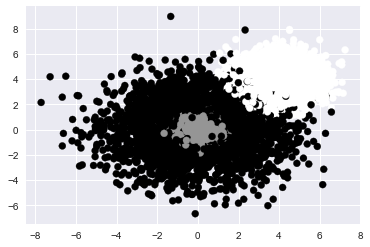

In [39]:
# The coordinates of the centers of our blobs.
centers = [[4, 4], [0, 0], [0,0]]
stds = [1, 0.5, 2]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=stds,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

## Kmeans

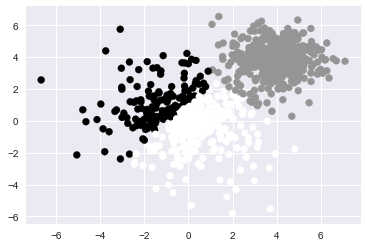

Comparing k-means clusters against the data:
col_0    0    1    2
row_0               
0        0  292  172
1      362    0   32
2        0   28  114


In [40]:
y_pred = KMeans(n_clusters=3, random_state=42).fit_predict(X_train)

# Plot the solution.
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y_train))

## Mean shift

[[ 0.01967585  0.06240047]
 [ 2.16649128  2.13359037]]


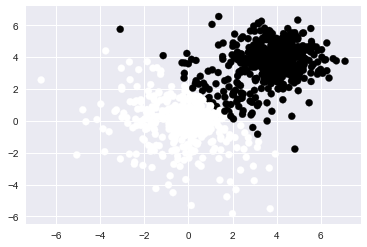

Comparing the assigned categories to the ones in the data:
col_0    0    1
row_0          
0        0  362
1      319    1
2      234   84


In [43]:
# Use default quintile of 0.3
bandwidth = estimate_bandwidth(X_train, quantile=0.4, n_samples=500)

ms = MeanShift(bandwidth = bandwidth)
ms.fit(X_train)

y_pred = ms.fit_predict(X_train)

cluster_centers = ms.cluster_centers_
print(cluster_centers)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,y_pred))

## Spectoral clustering

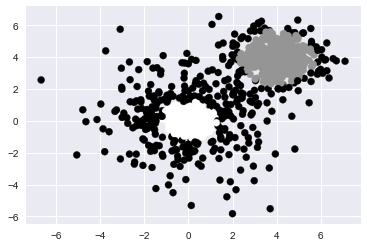

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0        0  289   73
1      300    0   20
2       47    5  266


In [44]:
sc = SpectralClustering(n_clusters = 3).fit(X_train)

#Predicted clusters.
y_pred=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,y_pred))

## Affinity propagation

[ 14 125 135 196 213 249 310 341 390 400 443 464 527 542 605 661 685 721
 764 812 817 835 863 869 902 916 931]


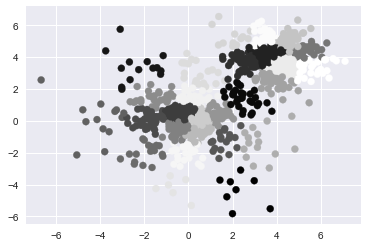

Comparing the assigned categories to the ones in the data:
col_0  0   1   2   3   4   5   6   7   8   9  ...  17  18  19  20  21  22  23  \
row_0                                         ...                               
0      31  30   0   0  65   0   0  10   0  43 ...   0   0   0   0   0  32  75   
1       0   0   1   8   0   0   0   0  87   0 ...   0   0   0   9  81   0   0   
2       2   0  23  19   0   6  19   2   9   0 ...  17  13  18  28  11   7   1   

col_0  24  25  26  
row_0              
0       0   4   0  
1       0   0   0  
2      14  29   8  

[3 rows x 27 columns]


In [50]:
af = AffinityPropagation(damping=0.95).fit(X_train)

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
print(cluster_centers_indices)

#Predicted clusters.
y_pred=af.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,y_pred))

# Conclusion

Output depends critically on assumptions and hyperparameters:

**KMeans**
- Only if number of clusters are known

** Mean shift **
- May need multiple iterations for good bandwith/ quintile
- Problematic if underlying structure is not well understood or complex (can't eyeball it)

** Affinity propagation**
- 'Overfits' number of clusters, even with high dampening
- So if k unknown this model is still problematic (even if k is estimated in the model)

** Spectoral clustering**
- Does well if clusters aren't well behaved, but still need to set k